<a href="https://colab.research.google.com/github/victorccard/victorccard/blob/main/AnaliseirbnbLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise dos Dados do Airbnb - Los Angeles**
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.
<p>
<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

---

**Neste notebook, iremos analisar os dados referentes à cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Los Angeles (good for visualisations).*

In [2]:
# Importar os pacotes necessários

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**


* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário(anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - Mostra se o imóvel fica localizado dentro de LA ou em outras cidades.
* `neighbourhood`	- Nome do bairro
* `latitude` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade	
* `room_type` - Informa o tipo de quarto que é oferecido
* `price`	- Preço para alugar o imóvel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews`	- Número de reviews que a propriedade possui
* `last_review`	- Data do último review
* `reviews_per_month`	- Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias


In [3]:
# Carregar os dados do arquivo
df = pd.read_csv('listings (1).csv')

In [4]:
# Mostrar as 5 primeiras linhas do nosso dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,183319,Panoramic Ocean View Venice Beach,867995,Barbara X,City of Los Angeles,Venice,33.99211,-118.47600,Entire home/apt,152,30,3,2019-02-25,0.02,2,0,0,NaN
1,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,139,0,NaN
2,51307,Spanish Bungalow Guest House LA CA. 30 plus ni...,235568,David,City of Los Angeles,Atwater Village,34.12206,-118.26783,Entire home/apt,75,30,138,2020-12-13,0.98,2,224,0,NaN
3,184314,Boho Chic Flat..Steps to Beach!,884031,Ashley,City of Los Angeles,Venice,33.97487,-118.46312,Entire home/apt,125,30,30,2017-12-24,0.22,1,0,0,NaN
4,51498,Guest House With Its Own Entrance/Exit and Hot...,236758,Bay,City of Los Angeles,Mar Vista,34.00389,-118.44126,Entire home/apt,189,3,378,2022-08-21,2.60,1,348,41,HSR19-001336


## **Q1. Quantos atributos(variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

#### Quantas entradas nosso conjunto de dados possui e quais os tipos de dados?

Nosso conjunto de dados possui 45815 entradas.

In [5]:
# Identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))

Variáveis:	 45815
Entradas:	 18



In [6]:
# Verificar os tipos de entradas do dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

##**Q2. Qual a porcentagem de valores ausentes no dataset?**

### É possível observar 3 situações importantes:

* license possui 73,81% dos seus valores faltantes.
* As variáveis reviews_per_month e last_review possuem valores nulos em 1/4 do dataset
* As variáveis name e host_name têm menos de 0.1% dos valores nulos.

In [7]:
# Somando a quantidade de valores ausentes dividindo pelo dataset para mostrar 
# em porcentagem e ordenando pelos maiores valores.

(df.isna().sum() / df.shape[0]*100).sort_values(ascending=False)

license                           73.816436
reviews_per_month                 23.090691
last_review                       23.090691
neighbourhood_group               17.219251
host_name                          0.028375
name                               0.004365
number_of_reviews                  0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
id                                 0.000000
minimum_nights                     0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

#**Q3. Qual o tipo de distribuição das variáveis**
###Para identificar a distribuição das variáveis, irei plotar o histograma

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f009942a9d0>,
      dtype=object)

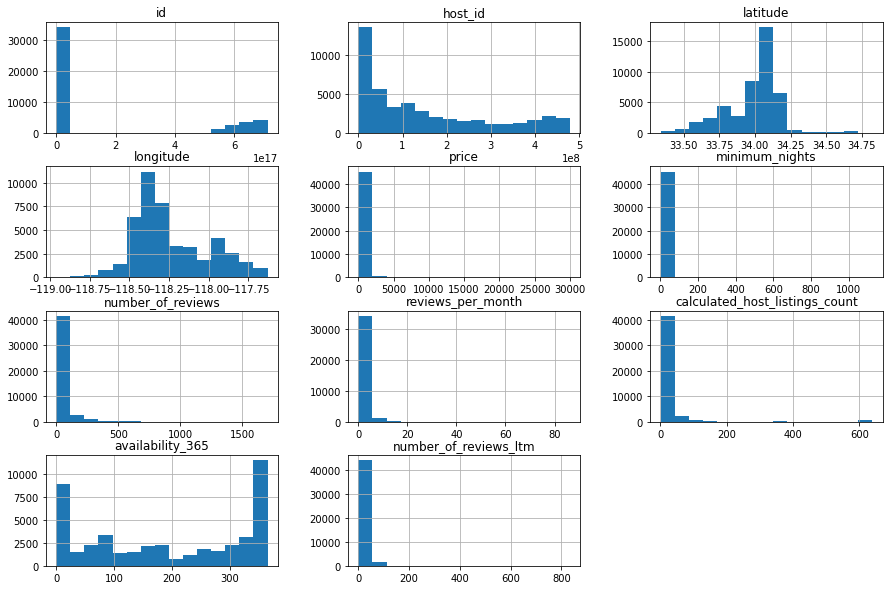

In [8]:
df.hist(bins=15, figsize=(15,10))

#**Q4. Há outliers presentes?**
####Pela forma que os dados estão distribuídos é possível verificar a presença de outliers. Como exemplo podemos pegar as colunas calculated_host_listings_count , price e minimum_nights 
####Os valores não seguem uma distribuição padrão. Para confirmar podemos usar dois métodos de verificação da presença de outliers:
* Resumo estatístico por meio do método describe()
  * De acordo com nossa analise na cidade de los angeles as pessoas costumam usar o airbnb diferente do brasil no qual se usa normalmente para períodos curtos já em Los Angeles eles costumam usar para periodos mais longos como uso mensal.
* Plotar boxplots para a variável

In [9]:
# Resumo Estatístico usando describe.
df[['price',	'minimum_nights',	'number_of_reviews',	'reviews_per_month',	
    'calculated_host_listings_count',	'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,45815.000000,45815.000000,45815.000000,35236.000000,45815.000000,45815.000000
mean,290.189043,17.874081,35.199302,1.577828,22.099596,192.783062
std,720.187798,30.333167,72.752237,1.894040,81.801488,139.298767
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,90.000000,2.000000,1.000000,0.270000,1.000000,61.000000
50%,150.000000,7.000000,6.000000,0.890000,2.000000,180.000000
75%,274.000000,30.000000,35.000000,2.350000,9.000000,341.000000
max,30000.000000,1124.000000,1702.000000,86.210000,638.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

- A variável `price` possui 75% do valor abaixo de $274, porém seu valor máximo é $45815.
- A quantidade mínima de noites (`minimum_nights`) está acima do limite real de 365 dias no ano.

In [10]:
#Contagem de quantidade de noites minimas
df['minimum_nights'].value_counts()

30     15674
1       8593
2       7038
31      5031
3       4487
       ...  
44         1
37         1
94         1
229        1
186        1
Name: minimum_nights, Length: 105, dtype: int64


#### Boxplot para minimum_nights

valores acima de 30 dias de minimum_nights
5876 Entrada
12.83%


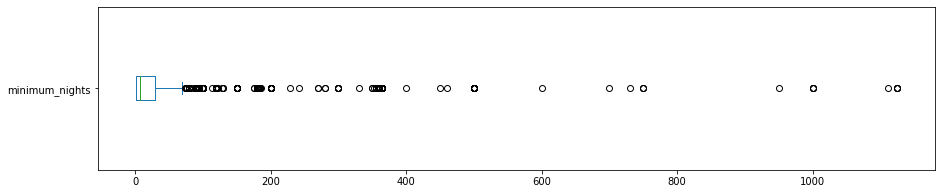

In [11]:
# Boxplot de minimum nights
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15,3))

# Ver quantitade de valores acima de 30 dias de minimum_nights
print('valores acima de 30 dias de minimum_nights')
print('{} Entrada'.format(len(df[df['minimum_nights'] > 30])))
print('{:.2f}%'.format(len(df[df['minimum_nights'] > 30]) / df.shape[0]*100))

Valores Acima de $1500
971 Valores
2.12%


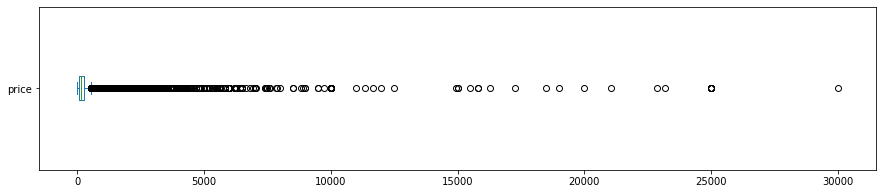

In [12]:
#Price
df['price'].plot(kind='box', vert=False, figsize=[15,3])

# Ver quantidade de valores acima de $1500
print('Valores Acima de $1500')
print('{} Valores'.format(len(df[df['price'] > 1500])))
print('{:.2f}%'.format(len(df[df['price'] > 1500]) / df.shape[0]*100))

Anfitriões com mais de 100 imoveis no Airbnb
1882 Entrada
4.107824948161083%


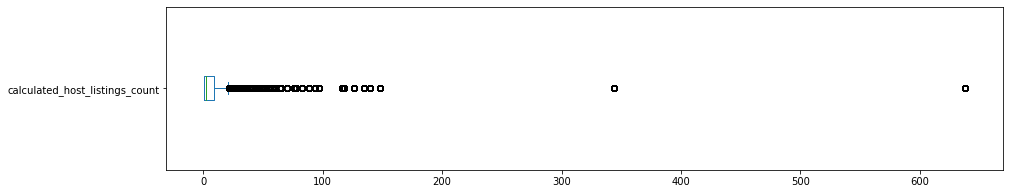

In [13]:
# calculated_host_listings_count
df['calculated_host_listings_count'].plot(kind='box', vert=False, figsize=[15,3])

# Anfitriões que alugam mais que 100 imoveis
print('Anfitriões com mais de 100 imoveis no Airbnb')
print('{} Entrada'.format(len(df[df['calculated_host_listings_count'] > 100 ])))
print('{}%'.format(len(df[df['calculated_host_listings_count'] > 100]) / 
                   df.shape[0]*100))

###**Histogramas sem outliers**
Já que identificamos outliers nas variáveis ``price``, ``minimum_nights`` e ``calculated_host_listings_count`` vamos agora limpar o DataFrame delas e plotar novamente o histograma.

*Fiz a limpeza dos bairros que possuem menos de 20 valores no dataset para facilitar na percepção de bairros mais caros.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00988dbf10>,
      dtype=object)

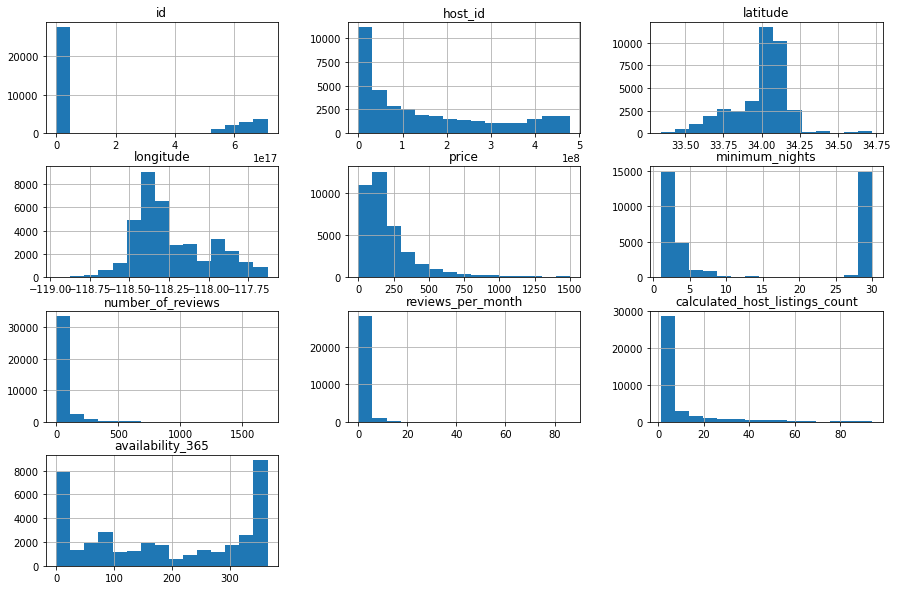

In [14]:
# Remover os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 100].index,
              axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, 
              inplace=True)
df_clean.drop(df_clean[(df_clean['neighbourhood'].value_counts().reindex
                        (df_clean['neighbourhood']) < 20).values].index, 
              axis=0, inplace=True)

#Remover a coluna neighbourhood_group, number_of_reviews_ltm e license.
df_clean.drop('neighbourhood_group', axis=1, inplace=True)
df_clean.drop('number_of_reviews_ltm', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

# Histograma sem outliers
df_clean.hist(bins=15, figsize=[15,10])

In [15]:
# Bairros que possuem mais acomodações
df_clean['neighbourhood'].value_counts()

Venice                 1287
Hollywood              1133
West Hollywood          936
Long Beach              926
Downtown                880
                       ... 
Broadway-Manchester      22
Century City             21
Central-Alameda          21
West Puente Valley       21
Paramount                20
Name: neighbourhood, Length: 217, dtype: int64

### **Q4.1 Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [16]:
#Matriz de correlação
corr = df[['price',	'minimum_nights',	'number_of_reviews',	'reviews_per_month',
           'calculated_host_listings_count',	'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.018444,-0.058727,-0.041860,-0.015868,0.070684
minimum_nights,-0.018444,1.000000,-0.115722,-0.249624,0.056901,-0.006293
number_of_reviews,-0.058727,-0.115722,1.000000,0.560087,-0.097390,-0.039458
reviews_per_month,-0.041860,-0.249624,0.560087,1.000000,-0.105921,0.045321
calculated_host_listings_count,-0.015868,0.056901,-0.097390,-0.105921,1.000000,0.148228
availability_365,0.070684,-0.006293,-0.039458,0.045321,0.148228,1.000000


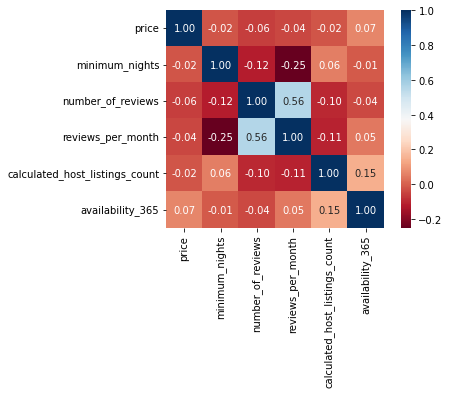

In [17]:
# Mapa de calor usando a biblioteca seaborn
sns.heatmap(corr, annot=True, cmap='RdBu', fmt='.2f', square=True, 
            linecolor='white')

#**Q5.Qual o tipo de imóvel mais alugado no Airbnb?**
####A coluna da variável room_type indica o tipo de locaçao que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casa inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

####Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().italicized text

In [18]:
# Mostra a quantidade de imóvel disponível
df_clean['room_type'].value_counts()

Entire home/apt    26238
Private room       10227
Shared room          764
Hotel room           123
Name: room_type, dtype: int64

In [19]:
# Mostra a porcentagem dos imóveis disponível
df_clean['room_type'].value_counts() / df_clean.shape[0]*100

Entire home/apt    70.245235
Private room       27.380060
Shared room         2.045406
Hotel room          0.329300
Name: room_type, dtype: float64

# **Q6. Qual a localidade mais cara em Los Angeles?**
###Vamos avaliar os bairros(neighbourhoods) a partir do preço de locação.

In [20]:
# Filtrar os bairros por média de preço em ordem descrescente
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Malibu                                   673.870229
Bel-Air                                  586.187500
Beverly Crest                            525.598039
Unincorporated Santa Monica Mountains    509.556962
Hollywood Hills West                     493.068602
Avalon                                   457.257732
Newport Beach                            443.749141
Pacific Palisades                        418.082090
Laguna Beach                             405.289855
Paramount                                394.000000
Name: price, dtype: float64

#**Q7. Qual é a média do mínimo de noites para alugar(minimum_nights)?**

In [21]:
# Média de noites minimas
df_clean['minimum_nights'].mean()

13.64703362604412

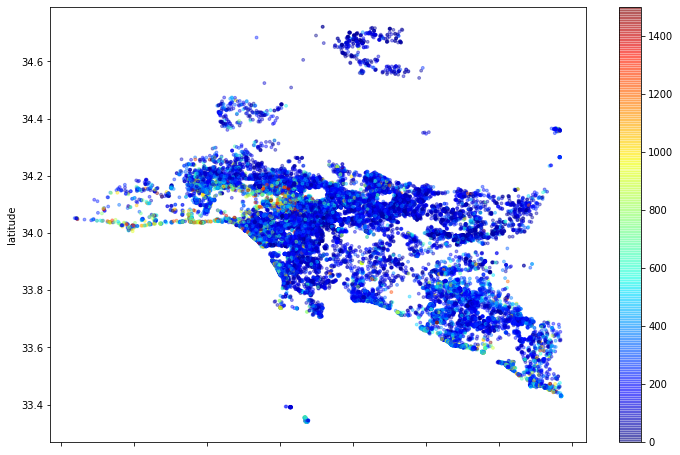

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, 
              c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));